# Model Selection of SVM in Intestinal Absortion Prediction

This section presents the model selection of Support  Vector Machine in Intestinal Absortition Prediction.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import joblib

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 

### Importing Dataset for training


- FC-1: NHA, LogP, MolWt, NAR, NRB, tPSA, NHD, fcSP3
- FC-2: NHA, LogP, tPSA

In [4]:
#Data_Train = joblib.load('./Dataset_Training_Test/Data_Train.pkl')

Data = pd.read_excel('dataset_HIA_geral.xlsx')

In [5]:
FC = 1

if FC == 1:
    X_Train = Data.drop(['Name','SMILES','Output'], axis=1)[0:140].values
    X_Test = Data.drop(['Name','SMILES','Output'], axis=1)[140:].values
    
else:
    X_Train = Data[['WLOGP','tPSA','NHA']][0:140].values #,'NHA'
    X_Test = Data[['WLOGP','tPSA','NHA']][140:].values
    

y_Train = Data[['Output']][0:140].values.ravel()
y_Test = Data[['Output']][140:].values.ravel()

In [6]:
# Scaling data

Scaler = MinMaxScaler().fit(X_Train)

X_train = Scaler.transform(X_Train)  
X_test = Scaler.transform(X_Test)  


In [7]:
joblib.dump(Scaler,'./Model_SVM_FC2/scaler.pkl')

['./Model_SVM_FC2/scaler.pkl']

### Creating and Training Model

In [8]:
# parameters of ANN models

param_grid = [{'kernel': ['rbf','sigmoid'], 'C': [500, 1000, 2000, 5000],'gamma': [0.1, 0.5, 1, 2]}]


In [9]:
# Cross Validation

SVM = SVC(random_state=0, max_iter=20000, probability=True)


GS = GridSearchCV(SVM, param_grid, cv=10, scoring='accuracy',return_train_score=True, n_jobs=-1)

In [10]:
GS.fit(X_train, y_Train)

GridSearchCV(cv=10,
             estimator=SVC(max_iter=20000, probability=True, random_state=0),
             n_jobs=-1,
             param_grid=[{'C': [500, 1000, 2000, 5000],
                          'gamma': [0.1, 0.5, 1, 2],
                          'kernel': ['rbf', 'sigmoid']}],
             return_train_score=True, scoring='accuracy')

In [11]:
# saving grid search

joblib.dump(GS,'./Model_SVM_FC2/GridSearch_SVM.pkl')

['./Model_SVM_FC2/GridSearch_SVM.pkl']

### Evaluating and Selecting Model

In [12]:
# loading grid search

GS_SVM= joblib.load('./Model_SVM_FC2/GridSearch_SVM.pkl')

In [13]:
# best estimator

GS_SVM.best_estimator_

SVC(C=500, gamma=1, max_iter=20000, probability=True, random_state=0)

In [14]:
# index of best model

print('Best Index = {}'.format(GS_SVM.best_index_+1))

Best Index = 5


In [15]:
# best parameters

GS_SVM.best_params_

{'C': 500, 'gamma': 1, 'kernel': 'rbf'}

In [16]:
# scores by model

cvres = GS_SVM.cv_results_

print('SVM Evaluation')
k=1
for mean_score, standard, params in zip(cvres["mean_test_score"], cvres["std_test_score"], cvres["params"]):
    print('M{}:'.format(k), round(mean_score,6), '+- {}'.format(round(standard,6)), params)
    k=k+1

SVM Evaluation
M1: 0.821429 +- 0.07986 {'C': 500, 'gamma': 0.1, 'kernel': 'rbf'}
M2: 0.835714 +- 0.090633 {'C': 500, 'gamma': 0.1, 'kernel': 'sigmoid'}
M3: 0.885714 +- 0.057143 {'C': 500, 'gamma': 0.5, 'kernel': 'rbf'}
M4: 0.742857 +- 0.128571 {'C': 500, 'gamma': 0.5, 'kernel': 'sigmoid'}
M5: 0.914286 +- 0.069985 {'C': 500, 'gamma': 1, 'kernel': 'rbf'}
M6: 0.692857 +- 0.101267 {'C': 500, 'gamma': 1, 'kernel': 'sigmoid'}
M7: 0.85 +- 0.08719 {'C': 500, 'gamma': 2, 'kernel': 'rbf'}
M8: 0.578571 +- 0.12956 {'C': 500, 'gamma': 2, 'kernel': 'sigmoid'}
M9: 0.835714 +- 0.071785 {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
M10: 0.828571 +- 0.072843 {'C': 1000, 'gamma': 0.1, 'kernel': 'sigmoid'}
M11: 0.885714 +- 0.079539 {'C': 1000, 'gamma': 0.5, 'kernel': 'rbf'}
M12: 0.764286 +- 0.084817 {'C': 1000, 'gamma': 0.5, 'kernel': 'sigmoid'}
M13: 0.864286 +- 0.108091 {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
M14: 0.728571 +- 0.1 {'C': 1000, 'gamma': 1, 'kernel': 'sigmoid'}
M15: 0.85 +- 0.081127 {'C': 1000

In [17]:
# All the CV scores by each Feaature Composition

Nmodels = len(GS_SVM.cv_results_["params"])

col_scr=[]
row_scr=[]

for k in range(10):
    col_scr.insert(k,'CV_{}'.format(k+1))
    
    
for j in range(Nmodels):
    row_scr.insert(j,'M{}'.format(j+1))

    
df_scores=[]    
for k in range(10):

    cvres = GS_SVM.cv_results_
    score_valid=np.concatenate((cvres['split0_test_score'].reshape(Nmodels,1),
                            cvres['split1_test_score'].reshape(Nmodels,1),
                            cvres['split2_test_score'].reshape(Nmodels,1),
                            cvres['split3_test_score'].reshape(Nmodels,1),
                            cvres['split4_test_score'].reshape(Nmodels,1),
                            cvres['split5_test_score'].reshape(Nmodels,1),
                            cvres['split6_test_score'].reshape(Nmodels,1),
                            cvres['split7_test_score'].reshape(Nmodels,1),
                            cvres['split8_test_score'].reshape(Nmodels,1),
                            cvres['split9_test_score'].reshape(Nmodels,1)),axis=1) 
    df_scores = pd.DataFrame(data=score_valid,index=row_scr,columns=col_scr).transpose()

In [18]:
df_scores

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M23,M24,M25,M26,M27,M28,M29,M30,M31,M32
CV_1,0.857143,0.857143,0.928571,0.714286,1.000000,0.642857,0.857143,0.500000,0.857143,0.857143,...,0.857143,0.500000,0.857143,0.785714,1.000000,0.714286,0.857143,0.714286,0.714286,0.500000
CV_2,0.714286,0.714286,0.928571,0.642857,0.928571,0.500000,0.642857,0.500000,0.857143,0.785714,...,0.571429,0.500000,0.857143,0.714286,0.714286,0.642857,0.714286,0.500000,0.571429,0.500000
CV_3,0.857143,0.857143,0.928571,0.857143,1.000000,0.857143,0.928571,0.642857,0.857143,0.857143,...,0.928571,0.642857,0.857143,0.857143,1.000000,0.857143,0.928571,0.857143,0.928571,0.642857
CV_4,0.857143,0.857143,0.928571,0.857143,0.928571,0.785714,0.928571,0.785714,0.857143,0.928571,...,0.928571,0.785714,0.928571,0.928571,0.928571,0.785714,0.928571,0.714286,0.928571,0.785714
CV_5,0.857143,0.928571,0.857143,0.785714,0.857143,0.785714,0.857143,0.785714,0.857143,0.857143,...,0.857143,0.785714,0.928571,0.857143,0.857143,0.785714,0.857143,0.857143,0.857143,0.785714
CV_6,0.857143,0.928571,0.928571,0.500000,1.000000,0.642857,0.928571,0.571429,0.857143,0.857143,...,0.928571,0.571429,0.857143,0.928571,0.928571,0.785714,0.857143,0.642857,0.928571,0.571429
CV_7,0.785714,0.785714,0.785714,0.642857,0.857143,0.714286,0.928571,0.357143,0.785714,0.785714,...,0.857143,0.357143,0.785714,0.714286,0.785714,0.642857,0.857143,0.714286,0.785714,0.357143
CV_8,0.928571,0.928571,0.928571,0.928571,0.928571,0.714286,0.785714,0.642857,0.928571,0.857143,...,0.642857,0.642857,0.928571,0.857143,0.857143,0.857143,0.785714,0.714286,0.714286,0.642857
CV_9,0.857143,0.857143,0.857143,0.857143,0.857143,0.714286,0.857143,0.500000,0.857143,0.857143,...,0.857143,0.500000,0.857143,0.857143,0.857143,0.857143,0.857143,0.714286,0.857143,0.500000
CV_10,0.642857,0.642857,0.785714,0.642857,0.785714,0.571429,0.785714,0.500000,0.642857,0.642857,...,0.785714,0.500000,0.642857,0.642857,0.857143,0.642857,0.714286,0.571429,0.785714,0.500000


In [19]:
df_scores.describe()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M23,M24,M25,M26,M27,M28,M29,M30,M31,M32
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.821429,0.835714,0.885714,0.742857,0.914286,0.692857,0.850000,0.578571,0.835714,0.828571,...,0.821429,0.578571,0.850000,0.814286,0.878571,0.757143,0.835714,0.700000,0.807143,0.578571
std,0.084179,0.095535,0.060234,0.135526,0.073771,0.106745,0.091906,0.136568,0.075668,0.076783,...,0.122567,0.136568,0.085516,0.096421,0.089405,0.090351,0.075668,0.110657,0.116885,0.136568
min,0.642857,0.642857,0.785714,0.500000,0.785714,0.500000,0.642857,0.357143,0.642857,0.642857,...,0.571429,0.357143,0.642857,0.642857,0.714286,0.642857,0.714286,0.500000,0.571429,0.357143
25%,0.803571,0.803571,0.857143,0.642857,0.857143,0.642857,0.803571,0.500000,0.857143,0.803571,...,0.803571,0.500000,0.857143,0.732143,0.857143,0.660714,0.803571,0.660714,0.732143,0.500000
50%,0.857143,0.857143,0.928571,0.750000,0.928571,0.714286,0.857143,0.535714,0.857143,0.857143,...,0.857143,0.535714,0.857143,0.857143,0.857143,0.785714,0.857143,0.714286,0.821429,0.535714
75%,0.857143,0.910714,0.928571,0.857143,0.982143,0.767857,0.928571,0.642857,0.857143,0.857143,...,0.910714,0.642857,0.910714,0.857143,0.928571,0.839286,0.857143,0.714286,0.910714,0.642857
max,0.928571,0.928571,0.928571,0.928571,1.000000,0.857143,0.928571,0.785714,0.928571,0.928571,...,0.928571,0.785714,0.928571,0.928571,1.000000,0.857143,0.928571,0.857143,0.928571,0.785714


(0.5, 1.05)

<Figure size 1800x1200 with 0 Axes>

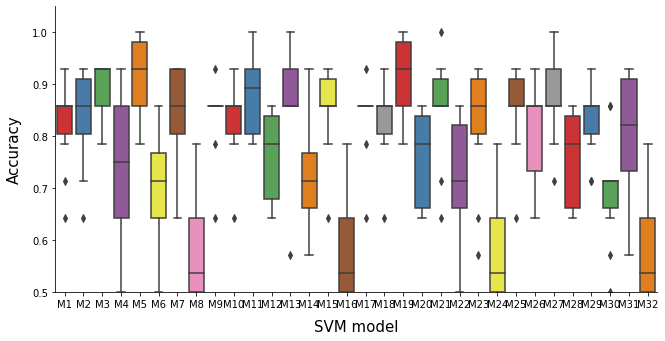

In [20]:
fig1 = plt.figure(dpi=300)

sns.catplot(kind="box",data=df_scores, height=4.5, aspect=2, palette='Set1')

plt.xlabel('SVM model',labelpad=10,fontsize=15)
plt.ylabel('Accuracy',labelpad=10,fontsize=15)
plt.ylim(0.5, 1.05)

### Saving Model

In [21]:
# saving best model

joblib.dump(GS_SVM.best_estimator_,'./Model_SVM_FC2/SVM_best_model.pkl')

['./Model_SVM_FC2/SVM_best_model.pkl']

In [22]:
# saving results

joblib.dump(df_scores,'./Model_SVM_FC2/df_scores.pkl')

['./Model_SVM_FC2/df_scores.pkl']

In [23]:
#saving figure

#fig1.savefig('./Model_SVM_FC2/fig1_SVM')

### Independent Test

In [24]:
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix

In [25]:
SVM_best = GS_SVM.best_estimator_

In [26]:
y_pred = SVM_best.predict(X_test)

In [27]:
print(classification_report(y_Test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79        21
           1       0.76      0.90      0.83        21

    accuracy                           0.81        42
   macro avg       0.82      0.81      0.81        42
weighted avg       0.82      0.81      0.81        42



In [28]:
tn, fp, fn, tp = confusion_matrix(y_Test,y_pred).ravel()
display('Accuracy = {}'.format((tp+tn)/(tp+tn+fp+fn)))
display('Sensitivity = {}'.format(tp/(tp+fn)))
display('Specificity = {}'.format(tn/(tn+fp)))

'Accuracy = 0.8095238095238095'

'Sensitivity = 0.9047619047619048'

'Specificity = 0.7142857142857143'